<img align="right" width="200" height="200" src="https://static.wikia.nocookie.net/lego/images/2/23/PPG_logo.png"> 

# <span style="color:#EF7C8E">Weekend Project - Heuristic Models - Machine Learning </span>
 


## <span style="color:#55BB99"> Group: Power Puff Girls</span>
### <span style="color:#726060"> Members: Wejdan Al-Ahmadi - Sara Aldubaie</span>
<hr style="border:2px solid gray"> </hr>

In [1]:
%%capture
# STARTER CODE - RUN THIS CELL - DO NOT CHANGE
!pip install category_encoders
import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, accuracy_score, recall_score, precision_score
df_r = sns.load_dataset("tips").dropna()
df_c = sns.load_dataset("titanic").dropna()
model_r = LinearRegression()
model_c = LogisticRegression()
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(df_r.drop("total_bill", axis=1), df_r["total_bill"])
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(df_c.drop(["survived", "alive", "adult_male"], axis=1), df_c["survived"])
pipe_r = make_pipeline(ce.OrdinalEncoder(), StandardScaler(), LinearRegression()).fit(x_train_r, y_train_r)
pipe_c = make_pipeline(ce.OrdinalEncoder(), StandardScaler(), LogisticRegression()).fit(x_train_c, y_train_c)
y_pred_r = pipe_r.predict(x_test_r)
y_pred_c = pipe_c.predict(x_test_c)

## <span style="color:#EF7C8E">1. Classification:</span>

<img align="center" src="./gifs/tt.gif"> 

### <span style="color:#55BB99">1. Splitting Titanic Data</span>

In [2]:
#Split your dataset to train and test.

# split the dataset 
training_c, testing_c = train_test_split(
df_c, 
train_size=0.8,    # 80%
test_size=0.2,     #20%
random_state = 42  # seed 
)

In [3]:
training_c.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
331,0,1,male,45.5,0,0,28.5000,S,First,man,True,C,Southampton,no,True
336,0,1,male,29.0,1,0,66.6000,S,First,man,True,C,Southampton,no,False
193,1,2,male,3.0,1,1,26.0000,S,Second,child,False,F,Southampton,yes,False
75,0,3,male,25.0,0,0,7.6500,S,Third,man,True,F,Southampton,no,True
248,1,1,male,37.0,1,1,52.5542,S,First,man,True,D,Southampton,yes,False


In [4]:
training_c.describe()

,survived,pclass,age,sibsp,parch,fare
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,0.682759,1.213793,35.444828,0.475862,0.468966,78.729943
std,0.467015,0.542451,15.101292,0.657043,0.764264,80.386214
min,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,35.000000,0.000000,0.000000,55.900000
75%,1.000000,1.000000,47.000000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [5]:
training_c.describe(include=object)

,sex,embarked,who,embark_town,alive
count,145,145,145,145,145
unique,2,3,3,3,2
top,female,S,woman,Southampton,yes
freq,74,94,68,94,99


### <span style="color:#55BB99">2. Build Heuristic Classification Model</span>

<img align="center" src="./gifs/test.gif"> 

#### <span style="color:#726060"> EDA on Titanic training dataset:</span>

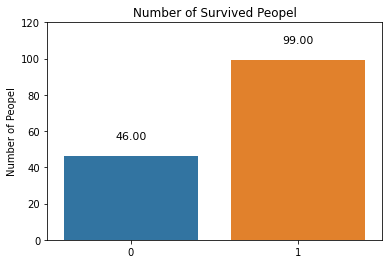

In [6]:
index = training_c['survived'].value_counts().index
values = training_c['survived'].value_counts().values

g4 = sns.barplot(x= index,y=values, data=training_c)

plt.title("Number of Survived Peopel")
plt.ylabel('Number of Peopel')

ax=g4

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11,  xytext=(0, 20),
                textcoords='offset points')
_ = g4.set_ylim(0,120) #To make space for the annotations

plt.show()


# number of servived peopel is highr.

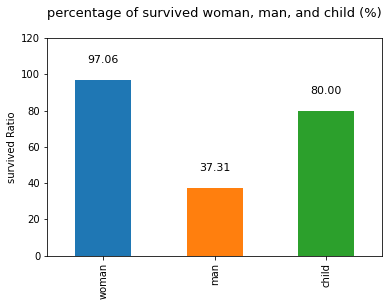

In [7]:
sur_y = training_c[training_c['survived'] == 1]

per = (sur_y['who'].value_counts()/training_c['who'].value_counts())*100
g3 = per.plot(kind = 'bar', color = ['#1F77B4', '#FF7F0E', '#2CA02C'])

plt.ylabel('survived Ratio')
plt.title('percentage of survived woman, man, and child (%)\n', size = 13)

ax=g3
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11,  xytext=(0, 20),
                textcoords='offset points')
_ = g3.set_ylim(0,120) #To make space for the annotations

plt.show()

# the percentage of survived woman and child is higher than man's

<AxesSubplot:xlabel='age', ylabel='survived'>

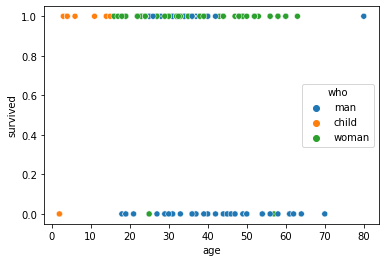

In [8]:
sns.scatterplot(data=training_c, x="age", y="survived", hue="who")

# only one child didn't survive 
# only two women's didn't survive 
# the man who did survived have age range between 25 and 45

<AxesSubplot:xlabel='age', ylabel='survived'>

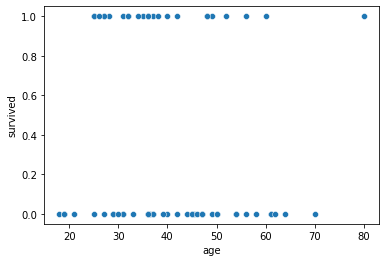

In [9]:
male = training_c[training_c['who'] == 'man']

sns.scatterplot(data=male, x="age", y="survived",)

# age range between 25 to 60 

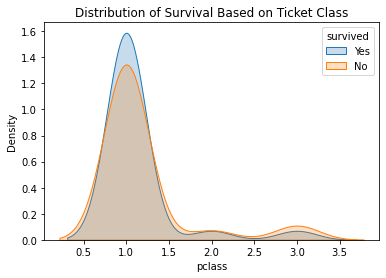

In [10]:
# filtering the data
sur_y = male[male['survived'] == 1]
sur_n = male[male['survived'] == 0]


sns.kdeplot(data=sur_y['pclass'], label="Yes", shade=True)
sns.kdeplot(data=sur_n['pclass'], label="No", shade=True)

plt.title('Distribution of Survival Based on Ticket Class')
plt.legend(title = 'survived')
plt.show()

# men with ticket class 1 have higher survival chance than other classes 

<AxesSubplot:xlabel='parch', ylabel='Count'>

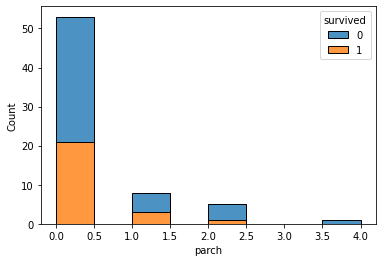

In [11]:
# man with a child 
sns.histplot(
    male,
    x="parch",
    hue="survived",
    multiple="stack",
    alpha=.8
)

# Men with no children have a higher chance to survive 
# the more children the lower chance to survive 

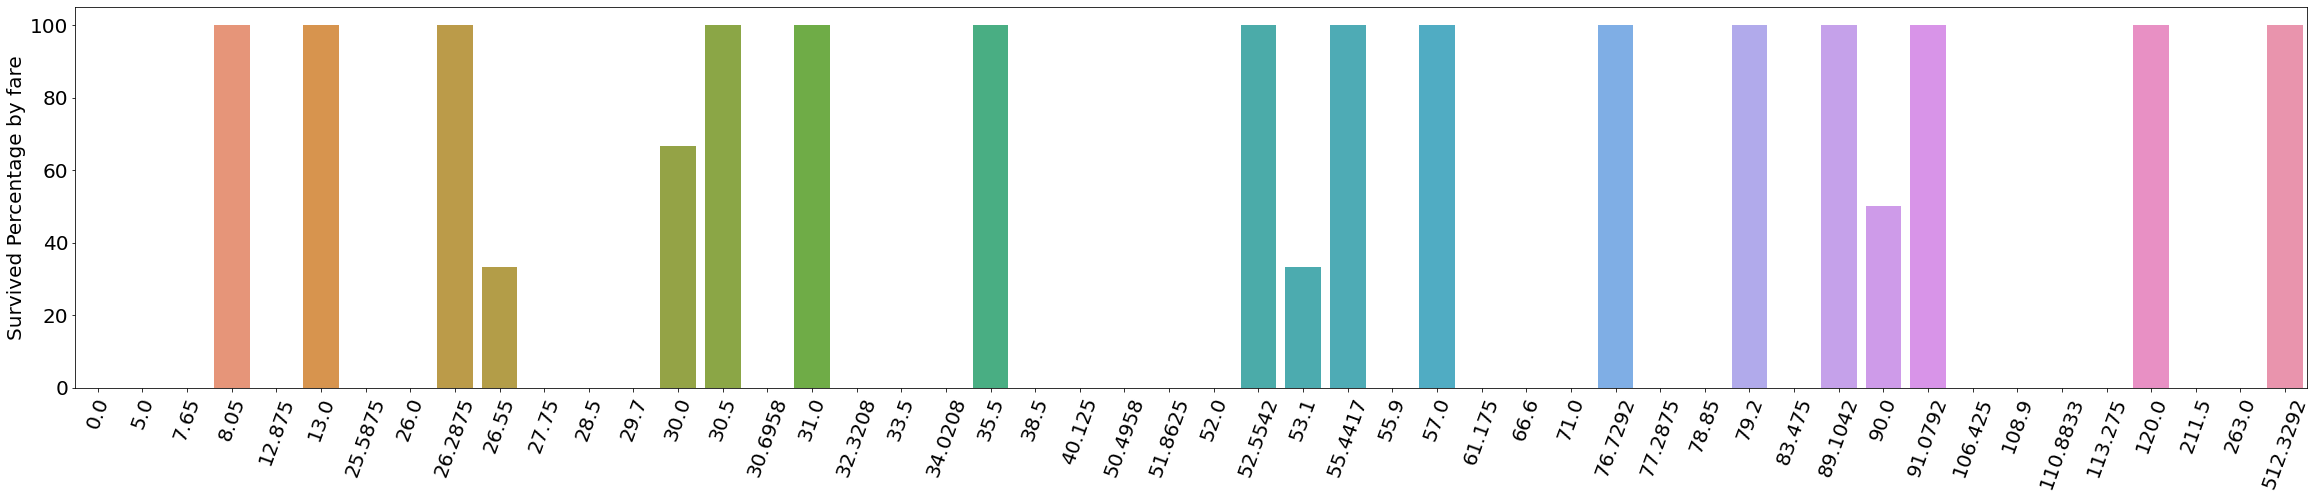

In [12]:
sur_y = male[male['survived'] == 1]

fare_all = male['fare'].value_counts()

fare_sur = sur_y['fare'].value_counts()
# empty list to store data in it 
fare = []
percentage_fare = []

for x in fare_all.index: # x = age number
    if not x in fare_sur: # if there is no attrition than its 0%
        fare.append(x) # age 
        percentage_fare.append(0) #0%
    else:
        y = (fare_sur[x]/fare_all[x])*100 # find percentage
        fare.append(x) # age 
        percentage_fare.append(y) # percentage
    
plt.figure(figsize=(40,7)) 
sns.barplot(x= fare , 
            y = percentage_fare)
plt.ylabel('Survived Percentage by fare', fontsize = 20)
plt.xticks(rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# ticket price is not a factor for survival for men 

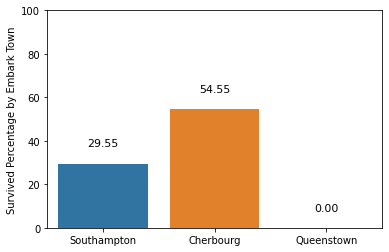

In [13]:
cabin_all = male['embark_town'].value_counts()
cabin_sur = sur_y['embark_town'].value_counts()
# empty list to store data in it 
cabin = []
percentage_cabin = []

for x in cabin_all.index: # x = embark_town
    if not x in cabin_sur: # if there is no survival than its 0%
        cabin.append(x) # embark_town 
        percentage_cabin.append(0) #0%
    else:
        y = (cabin_sur[x]/cabin_all[x])*100 # find percentage
        cabin.append(x) # embark_town 
        percentage_cabin.append(y) # percentage
    
#plt.figure(figsize=(40,7)) 
g = sns.barplot(x= cabin , 
            y = percentage_cabin)
plt.ylabel('Survived Percentage by Embark Town')

ax=g
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11,  xytext=(0, 20),
                textcoords='offset points')
_ = g.set_ylim(0,100) #To make space for the annotations

plt.show()

# Men that embark from town Cherbourg have a higher chance to survive 
# There is no survival from town Queenstown since it was only one man and he didn't survive 

In [14]:
male['embark_town'].value_counts()

Southampton    44
Cherbourg      22
Queenstown      1
Name: embark_town, dtype: int64

<img align="center" src="./gifs/try2.gif"> 

#### <span style="color:#726060"> Building the model:</span>

**Attempt 1:**

**Psuedo Code:**



<span style="color:#55BB99">**IF**</span> the person was a woman or child
    
    They will survive


<span style="color:#55BB99">**Else If**</span> the person was a man

    IF:
    - His age range between 25 - 60 
    - With number of children less than 2 
    - Embark Town is Cherbourg
     Else:
          NOT survive 


In [15]:
# Create function to perform our heuristic

def heuristic_survived(df):
    
    preds_survived = []
    for row in range(len(df)):
            # if  women or child 
            if (df.iloc[row]["who"] == 'child' or df.iloc[row]["who"] == 'woman' ):
                preds_survived.append(1)
            # if man 
            elif df.iloc[row]["who"] == 'man':
                if (25 <= df.iloc[row]["age"] <= 60) and  (df.iloc[row]["parch"] < 2) and  (df.iloc[row]["embark_town"] == 'Cherbourg') :
                    preds_survived.append(1)
                else:
                    preds_survived.append(0)
            
    return preds_survived

import warnings
warnings.filterwarnings('ignore')

training_c["preds_survived"] = heuristic_survived(training_c)


print("Recall Score: ",recall_score(training_c['survived'], training_c['preds_survived']))
print("Precision Score: ",precision_score(training_c['survived'], training_c['preds_survived']))
print("Accuracy Score: ",accuracy_score(training_c['survived'], training_c['preds_survived']))


Recall Score:  0.8686868686868687
Precision Score:  0.8865979381443299
Accuracy Score:  0.8344827586206897


**Attempt 2:**

**Psuedo Code:**



<span style="color:#55BB99">**IF**</span> the person was a woman or child
    
    They will survive


<span style="color:#55BB99">**Else If**</span> the person was a man

    IF:
    - His age range between 25 - 60 
    - With number of children less than 2 
     Else:
          NOT survive 

In [16]:
# Create function to perform our heuristic

def heuristic_survived(df):
    
    preds_survived = []
    for row in range(len(df)):
            # if  women or child 
            if (df.iloc[row]["who"] == 'child' or df.iloc[row]["who"] == 'woman' ):
                preds_survived.append(1)
            # if man 
            elif df.iloc[row]["who"] == 'man':
                if (25 <= df.iloc[row]["age"] <= 60) and  (df.iloc[row]["parch"] < 2):
                    preds_survived.append(1)
                else:
                    preds_survived.append(0)
            
    return preds_survived

import warnings
warnings.filterwarnings('ignore')

training_c["preds_survived"] = heuristic_survived(training_c)


print("Recall Score: ",recall_score(training_c['survived'], training_c['preds_survived']))
print("Precision Score: ",precision_score(training_c['survived'], training_c['preds_survived']))
print("Accuracy Score: ",accuracy_score(training_c['survived'], training_c['preds_survived']))

Recall Score:  0.9797979797979798
Precision Score:  0.7461538461538462
Accuracy Score:  0.7586206896551724


**Attempt 3:**

**Psuedo Code:**



<span style="color:#55BB99">**IF**</span> the person was a woman or child
    
    They will survive


<span style="color:#55BB99">**Else If**</span> the person was a man

    IF:
    - His age range between 25 - 60 
     Else:
          NOT survive 

In [17]:
# Create function to perform our heuristic

def heuristic_survived(df):
    
    preds_survived = []
    for row in range(len(df)):
            # if  women or child 
            if (df.iloc[row]["who"] == 'child' or df.iloc[row]["who"] == 'woman' ):
                preds_survived.append(1)
            # if man 
            elif df.iloc[row]["who"] == 'man':
                if (25 <= df.iloc[row]["age"] <= 60):
                    preds_survived.append(1)
                else:
                    preds_survived.append(0)
            
    return preds_survived


training_c["preds_survived"] = heuristic_survived(training_c)


print("Recall Score: ",recall_score(training_c['survived'], training_c['preds_survived']))
print("Precision Score: ",precision_score(training_c['survived'], training_c['preds_survived']))
print("Accuracy Score: ",accuracy_score(training_c['survived'], training_c['preds_survived']))

Recall Score:  0.98989898989899
Precision Score:  0.7313432835820896
Accuracy Score:  0.7448275862068966


**Attempt 4:**

**Psuedo Code:**



<span style="color:#55BB99">**IF**</span> the person was a woman or child
    
    They will survive


<span style="color:#55BB99">**Else If**</span> the person was a man

    IF:
    - With number of children less than 2 
     Else:
          NOT survive 

In [18]:
# Create function to perform our heuristic

def heuristic_survived(df):
    
    preds_survived = []
    for row in range(len(df)):
            # if  women or child 
            if (df.iloc[row]["who"] == 'child' or df.iloc[row]["who"] == 'woman' ):
                preds_survived.append(1)
            # if man 
            elif df.iloc[row]["who"] == 'man':
                if (df.iloc[row]["parch"] < 2):
                    preds_survived.append(1)
                else:
                    preds_survived.append(0)
            
    return preds_survived

training_c["preds_survived"] = heuristic_survived(training_c)


print("Recall Score: ",recall_score(training_c['survived'], training_c['preds_survived']))
print("Precision Score: ",precision_score(training_c['survived'], training_c['preds_survived']))
print("Accuracy Score: ",accuracy_score(training_c['survived'], training_c['preds_survived']))

Recall Score:  0.98989898989899
Precision Score:  0.7050359712230215
Accuracy Score:  0.7103448275862069


| Attempt | Performance Measures                                                                                                           | Conditions                                                                                                                                                                                                                             |
|:-------:|:------------------------------------------------------------------------------------------------------------------------------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
| 1       | Recall Score:  <br>0.8686868686868687 <br>Precision Score:  <br>0.8865979381443299 <br>Accuracy Score:  <br>0.8344827586206897 | IF the person was a woman or child: <br>They will survive  <br>Else if the person was a man      and - His age range between 25 - 60      - With number of children less than 2      - Embark Town is Cherbourg: <br> He will survive  |
| 2       | Recall Score:  <br>0.9797979797979798 <br>Precision Score:  <br>0.7461538461538462 <br>Accuracy Score:  <br>0.7586206896551724 | IF the person was a woman or child: <br>They will survive  <br>Else if the person was a man      and - His age range between 25 - 60      - With number of children less than 2: <br> He will survive                                  |
| 3       | Recall Score:  <br>0.9292929292929293 <br>Precision Score:  <br>0.7931034482758621 <br>Accuracy Score:  <br>0.7862068965517242 | IF the person was a woman or child: <br>They will survive  <br>Else if the person was a man      and - His age range between 25 - 60: <br> He will survive                                                                             |
| 4       | Recall Score:  <br>0.98989898989899 <br>Precision Score:  <br>0.7050359712230215 <br>Accuracy Score:  <br>0.7103448275862069   | IF the person was a woman or child: <br>They will survive  <br>Else if the person was a man      and - With number of children less than 2: <br> He will survive                                                                       |


### <span style="color:#55BB99">3. Testing Classification Model using Test split</span>

In [19]:
def heuristic_survived(df):
    
    preds_survived = []
    for row in range(len(df)):
            # if  women or child 
            if (df.iloc[row]["who"] == 'child' or df.iloc[row]["who"] == 'woman' ):
                preds_survived.append(1)
            # if man 
            elif df.iloc[row]["who"] == 'man':
                if (25 <= df.iloc[row]["age"] <= 60) and  (df.iloc[row]["parch"] < 2) and  (df.iloc[row]["embark_town"] == 'Cherbourg') :
                    preds_survived.append(1)
                else:
                    preds_survived.append(0)
            
    return preds_survived


testing_c["preds_survived"] = heuristic_survived(testing_c)

print("Recall Score: ",recall_score(testing_c['survived'], testing_c['preds_survived']))
print("Precision Score: ",precision_score(testing_c['survived'], testing_c['preds_survived']))
print("Accuracy Score: ",accuracy_score(testing_c['survived'], testing_c['preds_survived']))


Recall Score:  0.6666666666666666
Precision Score:  0.8
Accuracy Score:  0.6756756756756757


### <span style="color:#55BB99">4. Baseline Model for Classification</span>

In [20]:
def survived_mode(df):
    
    survived_mode = []
    for row in range(len(df)):
                survived_mode.append(df["survived"].mode()[0])
    return survived_mode

testing_c["survived_mode"] = survived_mode(testing_c)


print("Recall Score: ",recall_score(testing_c['survived'], testing_c['survived_mode']))
print("Precision Score: ",precision_score(testing_c['survived'], testing_c['survived_mode']))
print("Accuracy Score: ",accuracy_score(testing_c['survived'], testing_c['survived_mode']))

Recall Score:  1.0
Precision Score:  0.6486486486486487
Accuracy Score:  0.6486486486486487


### <span style="color:#55BB99">5. Our Classification HM VS. Logistic Regression</span>

In [21]:
print("Scikit's Logistic Regression Score results:")
print("Recall Score: ",recall_score(y_test_c, y_pred_c))
print("Precision Score: ",precision_score(y_test_c, y_pred_c))
print("Accuracy Score: ",accuracy_score(y_test_c, y_pred_c))

print("\nPower Puff Girl's Classification Score results:")


print("Recall Score: ",recall_score(testing_c['survived'], testing_c['preds_survived']))
print("Precision Score: ",precision_score(testing_c['survived'], testing_c['preds_survived']))
print("Accuracy Score: ",accuracy_score(testing_c['survived'], testing_c['preds_survived']))

Scikit's Logistic Regression Score results:
Recall Score:  0.8
Precision Score:  0.7272727272727273
Accuracy Score:  0.6739130434782609

Power Puff Girl's Classification Score results:
Recall Score:  0.6666666666666666
Precision Score:  0.8
Accuracy Score:  0.6756756756756757


## <span style="color:#EF7C8E">2. Regression:</span>

### <span style="color:#55BB99">1. Splitting Tips Data</span>
<img align="center" src="./gifs/tt.gif"> 



In [22]:
# split tips dataset
training_r, testing_r = train_test_split(
    df_r,
    train_size=0.8, # 80%
    test_size=0.2, #20%
    random_state=42
    )

In [23]:
training_r.head()

,total_bill,tip,sex,smoker,day,time,size
228,13.28,2.72,Male,No,Sat,Dinner,2
208,24.27,2.03,Male,Yes,Sat,Dinner,2
96,27.28,4.00,Male,Yes,Fri,Dinner,2
167,31.71,4.50,Male,No,Sun,Dinner,4
84,15.98,2.03,Male,No,Thur,Lunch,2


In [24]:
training_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 228 to 102
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  195 non-null    float64 
 1   tip         195 non-null    float64 
 2   sex         195 non-null    category
 3   smoker      195 non-null    category
 4   day         195 non-null    category
 5   time        195 non-null    category
 6   size        195 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [25]:
training_r.describe()

,total_bill,tip,size
count,195.000000,195.000000,195.000000
mean,20.217692,3.087795,2.574359
std,8.770505,1.429049,0.940695
min,5.750000,1.000000,1.000000
25%,13.660000,2.000000,2.000000
50%,17.920000,3.000000,2.000000
75%,24.855000,3.695000,3.000000
max,50.810000,10.000000,6.000000


In [26]:
training_r.describe(exclude="number")

,sex,smoker,day,time
count,195,195,195,195
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,127,120,70,142


In [27]:
# printing out categorical features

categorical_f = training_r.select_dtypes(include = ['category'])
for category in categorical_f:
    print('--'*40)
    print(category)
    print(training_r[category].value_counts())
    

--------------------------------------------------------------------------------
sex
Male      127
Female     68
Name: sex, dtype: int64
--------------------------------------------------------------------------------
smoker
No     120
Yes     75
Name: smoker, dtype: int64
--------------------------------------------------------------------------------
day
Sat     70
Sun     61
Thur    47
Fri     17
Name: day, dtype: int64
--------------------------------------------------------------------------------
time
Dinner    142
Lunch      53
Name: time, dtype: int64


### <span style="color:#55BB99">2. Build Heuristic Regression Model</span>

#### <span style="color:#726060"> EDA on Tips training dataset:</span>

<img align="center" src="./gifs/test.gif"> 

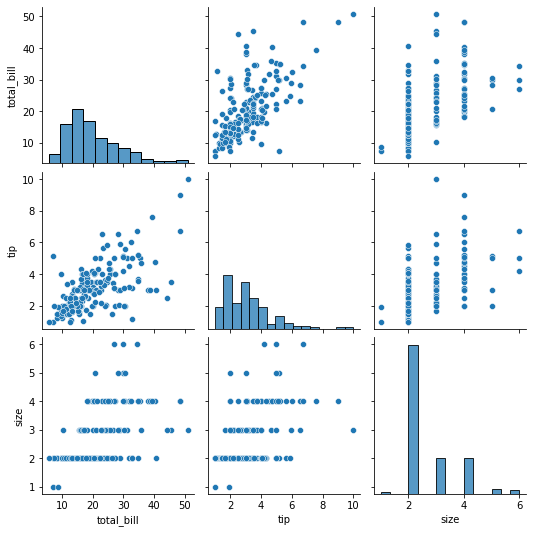

In [28]:
sns.pairplot(training_r)
# This plot helped me look at the relationships of the features and inspired other plots

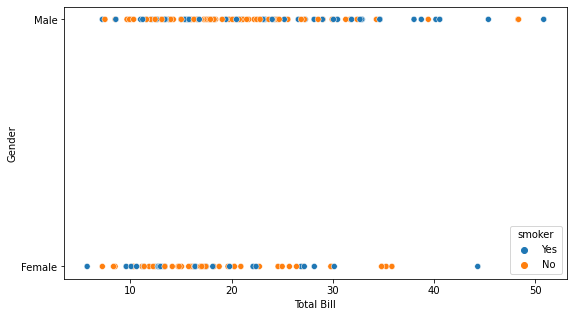

In [29]:
plt.figure(figsize=(9,5))
sns.scatterplot(x = 'total_bill', y = 'sex',hue='smoker', data=training_r)
plt.xlabel('Total Bill')
plt.ylabel('Gender')
plt.show()
# This plot shows that Males tend to pay higher prices then females, and also smokers tend to pay higher 
# when non-smokers dont

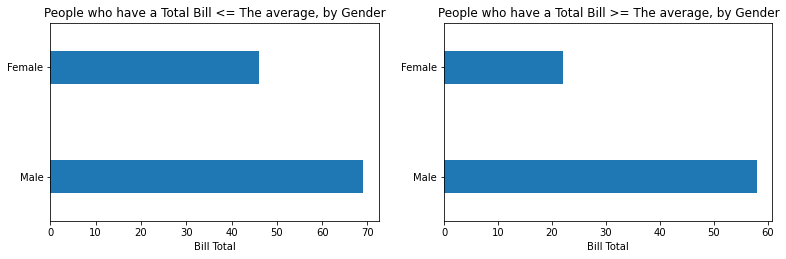

In [30]:
# get the average bill to plot
average_bill =training_r['total_bill'].mean()

plt.figure(figsize = (20,8))
#  subplot #1
plt.subplot(231)

training_r[training_r['total_bill']<=average_bill]['sex'].value_counts().plot(kind = 'barh', width = 0.3)
plt.xticks(rotation = 'horizontal')
plt.xlabel('Bill Total')
plt.title('People who have a Total Bill <= The average, by Gender')



#  subplot #2
plt.subplot(2,3,2)

training_r[training_r['total_bill']>=average_bill]['sex'].value_counts().plot(kind = 'barh', width = 0.3)
plt.xticks(rotation = 'horizontal')
plt.xlabel('Bill Total')
plt.title('People who have a Total Bill >= The average, by Gender')

plt.show()

# These plot show who payed below average by gender and above average by gender
# females tend to pay below average more than they do above 
# males are consistent

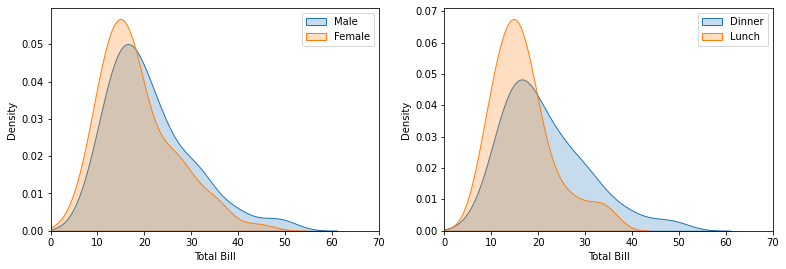

In [31]:
plt.figure(figsize=(20,9))


#  subplot #1
plt.subplot(231)

plt.xlim(0,70)
plt.xlabel('Total Bill')
plt.ylabel('Density')
sns.kdeplot(training_r[training_r['sex']=='Male']['total_bill'],label="Male",shade=True)
sns.kdeplot(training_r[training_r['sex']=='Female']['total_bill'],label="Female",shade=True)
plt.legend()

 #  subplot #2
plt.subplot(2,3,2)

plt.xlim(0,70)
plt.xlabel('Total Bill')
plt.ylabel('Density')
sns.kdeplot(training_r[training_r['time']=='Dinner']['total_bill'],label="Dinner",shade=True)
sns.kdeplot(training_r[training_r['time']=='Lunch']['total_bill'],label="Lunch",shade=True)
plt.legend()

plt.show()

# These plots show the density of the bills based on gender and time
# we notice a higher density in the lower ranges of bills for lunch time and females 
# but a higher density the higher the bill goes for males and lunch time

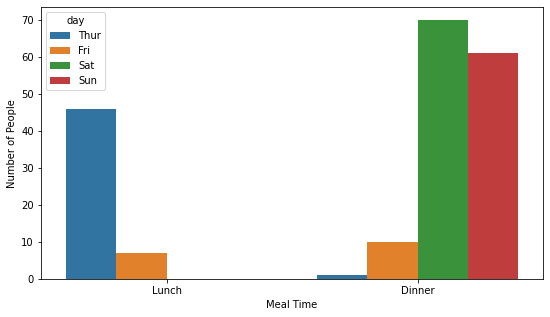

In [32]:
plt.figure(figsize=(9,5))
sns.countplot(x = 'time', hue = 'day', data=training_r)
plt.xlabel('Meal Time')
plt.ylabel('Number of People')
plt.show()

# we see that most people eat dinner and on the weekend (sat, sun)

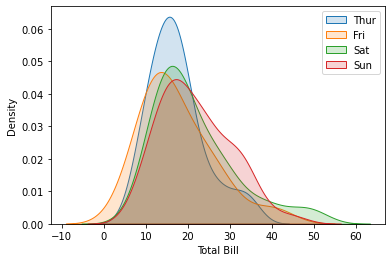

In [33]:
plt.xlabel('Total Bill')
plt.ylabel('Density')
sns.kdeplot(training_r[training_r['day']=='Thur']['total_bill'],label="Thur",shade=True, alpha=0.2)
sns.kdeplot(training_r[training_r['day']=='Fri']['total_bill'],label="Fri",shade=True, alpha=0.2)
sns.kdeplot(training_r[training_r['day']=='Sat']['total_bill'],label="Sat",shade=True, alpha=0.2)
sns.kdeplot(training_r[training_r['day']=='Sun']['total_bill'],label="Sun",shade=True, alpha=0.2)
plt.legend()
# This plot shows us the density of the bill based on the day
# thursday tends to have a higher density in the mid-range of the bill total 
# sun has an increasing density the higher the bill gets 
# and saturday has the highest density for higher bills

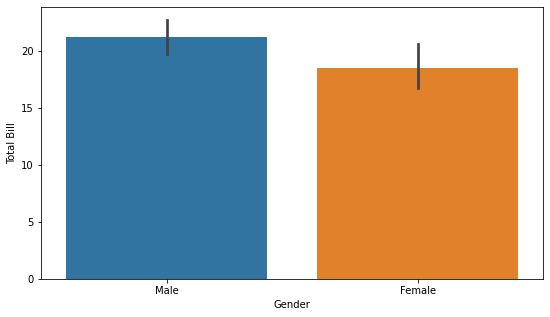

In [34]:
plt.figure(figsize=(9,5))
sns.barplot(x = 'sex', y = 'total_bill', data=training_r)
plt.xlabel('Gender')
plt.ylabel('Total Bill')
plt.show()
# this shows us that males tend to pay slightly more than females but not that much

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

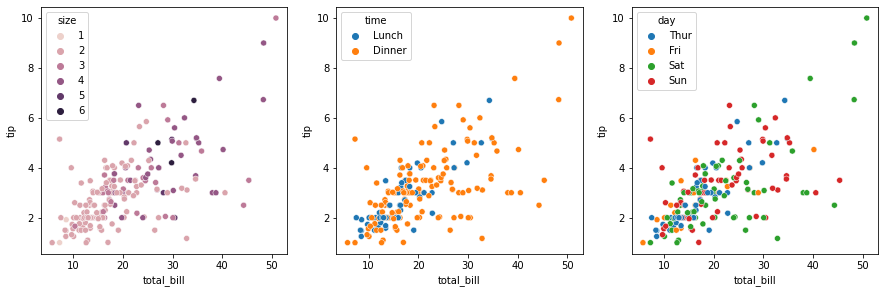

In [35]:
plt.figure(figsize=(15,10))
plt.subplot(231)
sns.scatterplot(data=training_r, x="total_bill", y="tip", hue="size")
plt.subplot(232)
sns.scatterplot(data=training_r, x="total_bill", y="tip", hue="time")
plt.subplot(233)
sns.scatterplot(data=training_r, x="total_bill", y="tip", hue="day")

# here we can see the breakup of bill vs tips while taking into consideration the size, time and day
# the lower the size the lower the bill and tip
# dinner tends to be more frequent and also higher in bill and tips
# Fri has the least amount of bills compared to the other three days

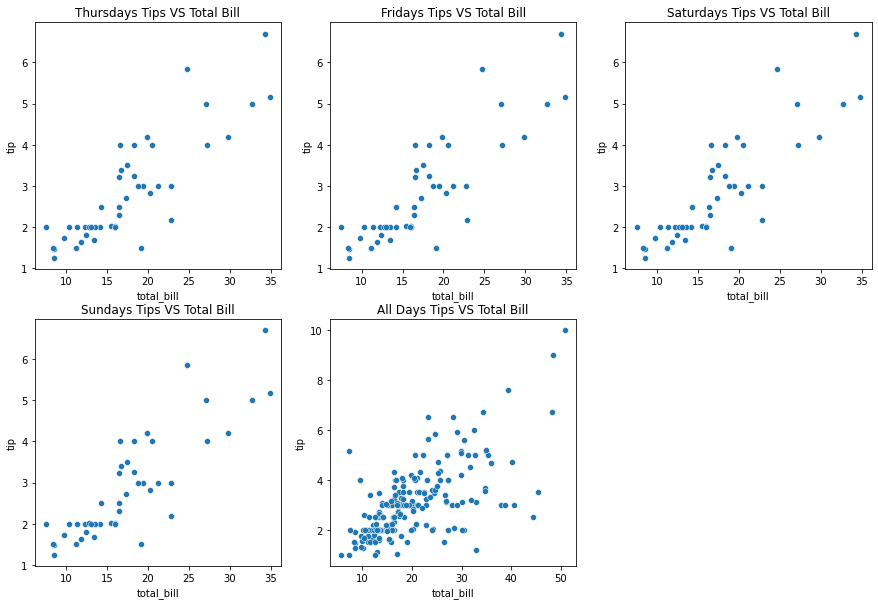

In [36]:
plt.figure(figsize=(15,10))
#  subplot #1
plt.subplot(231)
thurs=training_r[training_r['day']=='Thur']
sns.scatterplot(data=thurs, x="total_bill", y="tip")
plt.title("Thursdays Tips VS Total Bill")

#  subplot #2
plt.subplot(232)
fri=training_r[training_r['day']=='Fri']
sns.scatterplot(data=thurs, x="total_bill", y="tip")
plt.title("Fridays Tips VS Total Bill")

#  subplot #3
plt.subplot(233)
sat=training_r[training_r['day']=='Sat']
sns.scatterplot(data=thurs, x="total_bill", y="tip")
plt.title("Saturdays Tips VS Total Bill")

#  subplot #4
plt.subplot(234)
sun=training_r[training_r['day']=='Sun']
sns.scatterplot(data=thurs, x="total_bill", y="tip")
plt.title("Sundays Tips VS Total Bill")

#  subplot #4
plt.subplot(235)
sns.scatterplot(data=training_r, x="total_bill", y="tip")
plt.title("All Days Tips VS Total Bill")

plt.show()

# I wanted to see the relationship between the bill and tip for each day but I found them all to have similar patterns

#### <span style="color:#726060"> Building the model:</span>

<img align="center" src="./gifs/try2.gif"> 

In [37]:
# I wanted to look into ranges of the bill and the tips based on days

In [38]:
# THUR
thur_max_bill= training_r[training_r['day']=='Thur']['total_bill'].max() # max thur bill
thur_min_bill= training_r[training_r['day']=='Thur']['total_bill'].min() # min thur bill
thur_range = [thur_min_bill,thur_max_bill]                               # thur range
# FRI
fri_max_bill= training_r[training_r['day']=='Fri']['total_bill'].max()   # max fri bill
fri_min_bill= training_r[training_r['day']=='Fri']['total_bill'].min()   # min fri bill
fri_range = [fri_min_bill,fri_max_bill]                                  # fri range
# SAT
sat_max_bill= training_r[training_r['day']=='Sat']['total_bill'].max()   # max sat bill
sat_min_bill= training_r[training_r['day']=='Sat']['total_bill'].min()   # min sat bill
sat_range = [sat_min_bill,sat_max_bill]                                  # sat range
# SUN
sun_max_bill= training_r[training_r['day']=='Sun']['total_bill'].max()   # max sun bill
sun_min_bill= training_r[training_r['day']=='Sun']['total_bill'].min()   # min sun bill
sun_range = [sun_min_bill,sun_max_bill]                                  # sun range

# print the ranges
all_ranges={"Thursday's":thur_range,"Friday's":fri_range,"Saturday's":sat_range,"Sunday's":sun_range}
for k,v in all_ranges.items():
    print("--"*40)
    print(f"{k} Total Bill Range is: {v}")
print("--"*40)

--------------------------------------------------------------------------------
Thursday's Total Bill Range is: [7.51, 34.83]
--------------------------------------------------------------------------------
Friday's Total Bill Range is: [5.75, 40.17]
--------------------------------------------------------------------------------
Saturday's Total Bill Range is: [7.25, 50.81]
--------------------------------------------------------------------------------
Sunday's Total Bill Range is: [7.25, 45.35]
--------------------------------------------------------------------------------


In [39]:
# THUR
thur_max_tip= training_r[training_r['day']=='Thur']['tip'].max() # max thur bill
thur_min_tip= training_r[training_r['day']=='Thur']['tip'].min() # min thur bill
thur_range_tip = [thur_min_tip,thur_max_tip]                               # thur range
# FRI
fri_max_tip= training_r[training_r['day']=='Fri']['tip'].max()   # max fri bill
fri_min_tip= training_r[training_r['day']=='Fri']['tip'].min()   # min fri bill
fri_range_tip = [fri_min_tip,fri_max_tip]                                  # fri range
# SAT
sat_max_tip= training_r[training_r['day']=='Sat']['tip'].max()   # max sat bill
sat_min_tip= training_r[training_r['day']=='Sat']['tip'].min()   # min sat bill
sat_range_tip = [sat_min_tip,sat_max_tip]                                  # sat range
# SUN
sun_max_tip= training_r[training_r['day']=='Sun']['tip'].max()   # max sun bill
sun_min_tip= training_r[training_r['day']=='Sun']['tip'].min()   # min sun bill
sun_range_tip = [sun_min_tip,sun_max_tip]                                  # sun range

# print the ranges
all_ranges={"Thursday's":thur_range_tip,"Friday's":fri_range_tip,"Saturday's":sat_range_tip,"Sunday's":sun_range_tip}
for k,v in all_ranges.items():
    print("--"*40)
    print(f"{k} Total tip Range is: {v}")
print("--"*40)

--------------------------------------------------------------------------------
Thursday's Total tip Range is: [1.25, 6.7]
--------------------------------------------------------------------------------
Friday's Total tip Range is: [1.0, 4.73]
--------------------------------------------------------------------------------
Saturday's Total tip Range is: [1.0, 10.0]
--------------------------------------------------------------------------------
Sunday's Total tip Range is: [1.01, 6.5]
--------------------------------------------------------------------------------


##### <span style="color:#D8A7B1"> Attempt 1: Using the Max and Min range for each day</span>
**Psuedo Code:**



<span style="color:#55BB99">**If**</span> day is Thur


    assign prediction to random between Thur min bill and Thur max bill


<span style="color:#55BB99">**Else If**</span>  day is Fri


    assign prediction to random between Fri min bill and Fri max bill

<span style="color:#55BB99">**Else If**</span>  day is Sat

    assign prediction to random between Sat min bill and Sat max bill
             
<span style="color:#55BB99">**Else If**</span>  day is Sun

    assign prediction to random between Sun min bill and Sun max bill

**Explanation:**
* Get the range of bill for each day and randomize the prediction between that range

In [40]:
# get a copy
training_r_copy1 = training_r.copy()

"""
This function predicts the total bill using a range depending on the day
"""
def HM_bill_rng_D(df):
    preds = np.zeros(len(df))
    for x in range(len(df)):
        if(df.iloc[x]["day"]=='Thur'):
            preds[x]=round(random.uniform(thur_min_bill,thur_max_bill), 2)
        elif(df.iloc[x]["day"]=='Fri'):
            preds[x]=round(random.uniform(fri_min_bill,fri_max_bill), 2)
        elif(df.iloc[x]["day"]=='Sat'):
            preds[x]=round(random.uniform(sat_min_bill,sat_max_bill), 2)
        elif(df.iloc[x]["day"]=='Sun'):
            preds[x]=round(random.uniform(sun_min_bill,sun_max_bill), 2)
    return preds

# Apply Heuristic
training_r_copy1["Bill_Predict"] = HM_bill_rng_D(training_r_copy1)

In [41]:
# Run the HM model and calculate the cost 20 times, and get the mean
MSE1= np.array([])
MAE1=np.array([])
RMSE1=np.array([])
for i in range(20): 
    # Apply Heuristic
    training_r_copy1["Bill_Predict"] = HM_bill_rng_D(training_r_copy1)
    MSE1=np.append(MSE1,mean_squared_error(training_r_copy1["total_bill"], training_r_copy1["Bill_Predict"]))
    MAE1=np.append(MAE1,mean_absolute_error(training_r_copy1["total_bill"], training_r_copy1["Bill_Predict"]))
    RMSE1=np.append(RMSE1,mean_squared_error(training_r_copy1["total_bill"], training_r_copy1["Bill_Predict"], squared=False))
    
print("MSE: ", MSE1.mean())
print("MAE: ",MAE1.mean())
print("RMSE: ",RMSE1.mean())

MSE:  232.07906012820519
MAE:  12.308130769230768
RMSE:  15.224879625287965


##### <span style="color:#D8A7B1"> Attempt 2: Using a range for each day and adding Dinner/Lunch time on the weekend</span>
**Psuedo Code:**



<span style="color:#55BB99">**If**</span> day is Thur


    assign prediction to random between Thur min bill and Thur max bill


<span style="color:#55BB99">**Else If**</span>  day is Fri


    assign prediction to random between Fri min bill and Fri max bill

<span style="color:#55BB99">**Else If**</span>  day is Sat

     if its dinner time:
         assign prediction to random between Sat min bill+ (Sat max bill/2) and Sat max bill
     else:
         assign prediction to random between Sat min bill and Sat max bill
             
<span style="color:#55BB99">**Else If**</span>  day is Sun

     if its dinner time:
         assign prediction to random between Sun min bill+ (Sun max bill/2) and Sun max bill
     else:
         assign prediction to random between Sun min bill and Sun max bill

**Explanation:**
* If its Dinner time then I want the randomizer to pick from the higher side of the range specified, therefore I made it start from the min + max/2 and end at the max to shift it to start from the middle to the highest
* If its Lunch time randomize from the normal range
* However this increased the error 

In [42]:
# get a copy
training_r_copy2 = training_r.copy()

"""
This function predicts the total bill using a range depending on the day
Here I added if its dinner time on sat and sun then increase the min range by the max range divided by 2
"""
def HM_bill_rng_DT(df):
    preds = np.zeros(len(df))
    for x in range(len(df)):
        if(df.iloc[x]["day"]=='Thur'):
            preds[x]=round(random.uniform(thur_min_bill,thur_max_bill), 2)
        elif(df.iloc[x]["day"]=='Fri'):
            preds[x]=round(random.uniform(fri_min_bill,fri_max_bill), 2)
        elif(df.iloc[x]["day"]=='Sat'):
                if(df.iloc[x]["time"]=='Dinner'):
                    preds[x]=round(random.uniform(sat_min_bill+sat_max_bill/2,sat_max_bill), 2)
                else:
                    preds[x]=round(random.uniform(sat_min_bill,sat_max_bill), 2)
        elif(df.iloc[x]["day"]=='Sun'):
                if(df.iloc[x]["time"]=='Dinner'):
                    preds[x]=round(random.uniform(sun_min_bill+sun_max_bill/2,sun_max_bill), 2)
                else:
                    preds[x]=round(random.uniform(sun_min_bill,sun_max_bill), 2)
    return preds

# Apply Heuristic
training_r_copy2["Bill_Predict"] = HM_bill_rng_DT(training_r_copy2)

In [43]:
# Run the HM model and calculate the cost 20 times, and get the mean
MSE2= np.array([])
MAE2=np.array([])
RMSE2=np.array([])
for i in range(20): 
    # Apply Heuristic
    training_r_copy2["Bill_Predict"] = HM_bill_rng_DT(training_r_copy2)
    MSE2=np.append(MSE2,mean_squared_error(training_r_copy2["total_bill"], training_r_copy2["Bill_Predict"]))
    MAE2=np.append(MAE2,mean_absolute_error(training_r_copy2["total_bill"], training_r_copy2["Bill_Predict"]))
    RMSE2=np.append(RMSE2,mean_squared_error(training_r_copy2["total_bill"], training_r_copy2["Bill_Predict"], squared=False))
    
print("MSE: ", MSE2.mean())
print("MAE: ",MAE2.mean())
print("RMSE: ",RMSE2.mean())

MSE:  343.97847348717954
MAE:  15.852107692307689
RMSE:  18.54373033544939


##### <span style="color:#D8A7B1"> Attempt 3: Using a range for each day and adding Dinner/Lunch time on the weekend and Reducing the Max range to 35</span>
**Psuedo Code:**



<span style="color:#55BB99">**If**</span> day is Thur


    assign prediction to random between Thur min bill and Thur max bill


<span style="color:#55BB99">**Else If**</span>  day is Fri


    assign prediction to random between Fri min bill and 35

<span style="color:#55BB99">**Else If**</span>  day is Sat

     if its dinner time:
         assign prediction to random between Sat min bill+ (Sat max bill/2) and 35
     else:
         assign prediction to random between Sat min bill and 35
             
<span style="color:#55BB99">**Else If**</span>  day is Sun

     if its dinner time:
         assign prediction to random between Sun min bill+ (Sun max bill/2) and 35
     else:
         assign prediction to random between Sun min bill and 35

**Explanation:**
* After investigating the previous attempt it was due to some outliers as we saw in the scatter plot, so I reduced all the ranges max to be 35 which drastically improved the mode. 

In [44]:
# get a copy
training_r_copy3 = training_r.copy()

"""
This function predicts the total bill using a range depending on the day but the range ends with 35 due to outliers
Here I added if its dinner time on sat and sun then increase the min range by the max range divided by 2
"""
def HM_bill_rng_DT_35(df):
    preds = np.zeros(len(df))
    for x in range(len(df)):
        if(df.iloc[x]["day"]=='Thur'):
            preds[x]=round(random.uniform(thur_min_bill,thur_max_bill), 2)
        elif(df.iloc[x]["day"]=='Fri'):
            preds[x]=round(random.uniform(fri_min_bill,35), 2)
        elif(df.iloc[x]["day"]=='Sat'):
                if(df.iloc[x]["time"]=='Dinner'):
                    preds[x]=round(random.uniform(sat_min_bill+sat_max_bill/2,35), 2)
                else:
                    preds[x]=round(random.uniform(sat_min_bill,35), 2)
        elif(df.iloc[x]["day"]=='Sun'):
                if(df.iloc[x]["time"]=='Dinner'):
                    preds[x]=round(random.uniform(sun_min_bill+sun_max_bill/2,35), 2)
                else:
                    preds[x]=round(random.uniform(sun_min_bill,35), 2)
    return preds

# Apply Heuristic
training_r_copy3["Bill_Predict"] = HM_bill_rng_DT_35(training_r_copy3)

In [45]:
# Run the HM model and calculate the cost 20 times, and get the mean
MSE3= np.array([])
MAE3=np.array([])
RMSE3=np.array([])
for i in range(20): 
    # Apply Heuristic
    training_r_copy3["Bill_Predict"] = HM_bill_rng_DT_35(training_r_copy3)
    MSE3=np.append(MSE3,mean_squared_error(training_r_copy3["total_bill"], training_r_copy3["Bill_Predict"]))
    MAE3=np.append(MAE3,mean_absolute_error(training_r_copy3["total_bill"], training_r_copy3["Bill_Predict"]))
    RMSE3=np.append(RMSE3,mean_squared_error(training_r_copy3["total_bill"], training_r_copy3["Bill_Predict"], squared=False))
    
print("MSE: ", MSE3.mean())
print("MAE: ",MAE3.mean())
print("RMSE: ",RMSE3.mean())

MSE:  191.64134807692307
MAE:  11.988079487179489
RMSE:  13.842686899543343


##### <span style="color:#D8A7B1"> Attempt 4: Simplifying things with a simple range</span>

**Psuedo Code:**



<span style="color:#55BB99">**loop through df**</span> 

    assign each predict to a random range between 7,34



**Explanation:**
* Sometimes the less features you have can help predict a more accurate result, so I tried using a simple range from 7 to 34 based on the majority of the density in the scatter plot
* This lowered the error rate even more

In [46]:
# get a copy
training_r_copy4 = training_r.copy()

"""
This function predicts the total bill using a range from 7 to 34
"""
def HM_bill_rng(df):
    preds = np.zeros(len(df))
    for x in range(len(df)):

        preds[x]=round(random.uniform(7,34), 2)

    return preds

# Apply Heuristic
training_r_copy4["Bill_Predict"] = HM_bill_rng(training_r_copy4)

In [47]:
# Run the HM model and calculate the cost 20 times, and get the mean
MSE4= np.array([])
MAE4=np.array([])
RMSE4=np.array([])
for i in range(20): 
    # Apply Heuristic
    training_r_copy4["Bill_Predict"] = HM_bill_rng(training_r_copy4)
    MSE4=np.append(MSE4,mean_squared_error(training_r_copy4["total_bill"], training_r_copy4["Bill_Predict"]))
    MAE4=np.append(MAE4,mean_absolute_error(training_r_copy4["total_bill"], training_r_copy4["Bill_Predict"]))
    RMSE4=np.append(RMSE4,mean_squared_error(training_r_copy4["total_bill"], training_r_copy4["Bill_Predict"], squared=False))
    
print("MSE: ", MSE4.mean())
print("MAE: ",MAE4.mean())
print("RMSE: ",RMSE4.mean())

MSE:  138.67254735897433
MAE:  9.449997435897435
RMSE:  11.76804125743853


##### <span style="color:#D8A7B1"> Attempt 5: Using 2 Ranges based on the size, tip and time </span>

**Psuedo Code:**



<span style="color:#55BB99">**If**</span> the size of the group of people is 4 or less and the tip is 4 or less


    Check if its lunch time and divide range by half, otherwise keep the range


<span style="color:#55BB99">**Else If**</span>  the size of the group of above 5 and their tips are above 5


    Check if its lunch time and divide range by half, otherwise keep the range


<span style="color:#55BB99">**Else**</span> use the first range

**Explanation:**
* Depending on the size of the group and their tips it picks a range. 
* Then depending on the time if its lunch or dinner, dinner gets the higher end of the randomizer
* This has reduced the error

In [48]:
# get a copy
training_r_copy5 = training_r.copy()

"""
This function predicts the total bill using a range depending on the size, tip and time respectively
If its lunch time then divide the range by 2, otherwise keep it the same
"""
def HM_bill_rng_STT(df):
    preds = np.zeros(len(df))
    range1=[7,20]
    range2=[21,34]
    for x in range(len(df)):
        if(df.iloc[x]["size"]<=4)& (df.iloc[x]["tip"]<=4):
            if(df.iloc[x]["time"]=='lunch'):
                preds[x]=round(random.uniform(range1[0]/2,range1[1]/2), 2)
            else:
                preds[x]=round(random.uniform(range1[0],range1[1]), 2)
            
        elif(df.iloc[x]["size"]>=5)& (df.iloc[x]["tip"]>=5):
            if(df.iloc[x]["time"]=='lunch'):
                preds[x]=round(random.uniform(range2[0]/2,range2[1]/2), 2)
            else:
                preds[x]=round(random.uniform(range2[0],range2[1]), 2)
        else:
            preds[x]=round(random.uniform(range1[0],range1[1]), 2)

    return preds

# Apply Heuristic
training_r_copy5["Bill_Predict"] = HM_bill_rng_STT(training_r_copy5)


In [49]:
# Run the HM model and calculate the cost 20 times, and get the mean
MSE5= np.array([])
MAE5=np.array([])
RMSE5=np.array([])
for i in range(20): 
    # Apply Heuristic
    training_r_copy5["Bill_Predict"] = HM_bill_rng_STT(training_r_copy5)
    MSE5=np.append(MSE5,mean_squared_error(training_r_copy5["total_bill"], training_r_copy5["Bill_Predict"]))
    MAE5=np.append(MAE5,mean_absolute_error(training_r_copy5["total_bill"], training_r_copy5["Bill_Predict"]))
    RMSE5=np.append(RMSE5,mean_squared_error(training_r_copy5["total_bill"], training_r_copy5["Bill_Predict"], squared=False))
    
print("MSE: ", MSE5.mean())
print("MAE: ",MAE5.mean())
print("RMSE: ",RMSE5.mean())

MSE:  130.0021353333333
MAE:  8.354153846153846
RMSE:  11.399287809067165


##### <span style="color:#D8A7B1"> Attempt 6: Using 2 Ranges based on the size, time, tip and day </span>

**Psuedo Code:**



<span style="color:#55BB99">**If**</span> the size of the group of people is 4 or less


     if its lunch time and the tips are 4 or less:
         divide range by half
     else:
         if its Sat OR Sun OR Thur:
             increase starting range by 3 times, otherwise keep range the same


<span style="color:#55BB99">**Else If**</span>  the size of the group of above 5 


     if its lunch time and the tips are 5 or more:
         divide range by half
     else:
         if its Sat OR Sun OR Thur:
             increase starting range by 3 times, otherwise keep range the same


<span style="color:#55BB99">**Else**</span> use the first range

**Explanation:**
* Depending on the size of the group it picks a range. 
* Then depending on the time if its lunch or dinner and the tip amount, dinner gets the higher end of the randomizer
* Then depending on if its Sat, Sun, or Thur this increases the starting range by 3 times
* This has reduced the error

In [50]:
# get a copy
training_r_copy6 = training_r.copy()

"""
This function predicts the total bill using a range depending on the size, time tip and day respectively
Here I added if its dinner time on sat and sun then increase the min range by the max range divided by 2
"""
def HM_bill_rng_STTD(df):
    preds = np.zeros(len(df))
    range1=[7,20]
    range2=[15,34]
    for x in range(len(df)):
        if(df.iloc[x]["size"]<=4):
            if(df.iloc[x]["time"]=='Lunch')&(df.iloc[x]["tip"]<=4):
                preds[x]=round(random.uniform(range1[0]/2,range1[1]/2), 2)     
            else:
                if(df.iloc[x]["day"]=='Sat')|(df.iloc[x]["day"]=='Sun')|(df.iloc[x]["day"]=='Thur'):
                    preds[x]=round(random.uniform(range1[0]*3,range1[1]), 2)
                else:
                    preds[x]=round(random.uniform(range1[0],range1[1]), 2)
            
        elif(df.iloc[x]["size"]>=5):
            if(df.iloc[x]["time"]=='Lunch')& (df.iloc[x]["tip"]>=5):
                preds[x]=round(random.uniform(range2[0]/2,range2[1]/2), 2)
                
            else:
                if(df.iloc[x]["day"]=='Sat')|(df.iloc[x]["day"]=='Sun')|(df.iloc[x]["day"]=='Thur'):
                    preds[x]=round(random.uniform(range2[0]*3,range2[1]), 2)
                else:
                    preds[x]=round(random.uniform(range2[0],range2[1]), 2)
        else:
            preds[x]=round(random.uniform(range1[0],range1[1]), 2)

    return preds

# Apply Heuristic
training_r_copy6["Bill_Predict"] = HM_bill_rng_STTD(training_r_copy6)


In [51]:
# Run the HM model and calculate the cost 20 times, and get the mean
MSE6= np.array([])
MAE6=np.array([])
RMSE6=np.array([])
for i in range(20): 
    # Apply Heuristic
    training_r_copy6["Bill_Predict"] = HM_bill_rng_STTD(training_r_copy6)
    MSE6=np.append(MSE6,mean_squared_error(training_r_copy6["total_bill"], training_r_copy6["Bill_Predict"]))
    MAE6=np.append(MAE6,mean_absolute_error(training_r_copy6["total_bill"], training_r_copy6["Bill_Predict"]))
    RMSE6=np.append(RMSE6,mean_squared_error(training_r_copy6["total_bill"], training_r_copy6["Bill_Predict"], squared=False))
    
print("MSE: ", MSE6.mean())
print("MAE: ",MAE6.mean())
print("RMSE: ",RMSE6.mean())

MSE:  95.22589633333332
MAE:  7.791182051282052
RMSE:  9.75748372476317


##### <span style="color:#D8A7B1"> Attempt 7: Using the tip and bill mean </span>

**Psuedo Code:**



<span style="color:#55BB99">**If**</span> tip is 4 or less


     get mean of bill where tips are 4 or less and assign to predict


<span style="color:#55BB99">**Else If**</span>  tip is between 4.1 and 6


     get mean of bill where tips are between 4.1 and 6 and assign to predict


<span style="color:#55BB99">**Else If**</span>  tip is between 6.1 and 8


     get mean of bill where tips are between 6.1 and 8 and assign to predict


<span style="color:#55BB99">**Else**</span> get mean of bill where tips are between 8.1 and 10 and assign to predict

**Explanation:**
* Assign predictions based on the tips. 
* Get the mean of the bill for each tip range.
* This gave me a better error rate by almost half.

In [52]:
# get a copy
training_r_copy7 = training_r.copy()

"""
This function predicts the total bill using the mean of the bill based on the tip amount
"""
def HM_bill_tip_mean(df):
    preds = np.zeros(len(df))

    for x in range(len(df)):
        if(df.iloc[x]["tip"]<=4):
            preds[x]= df[(df['tip']<=4)]['total_bill'].mean()
        elif(df.iloc[x]["tip"]>4)& (df.iloc[x]["tip"]<=6):
            preds[x]= df[(df['tip']>4)&(df['tip']<=6)]['total_bill'].mean()
        elif(df.iloc[x]["tip"]>6)& (df.iloc[x]["tip"]<=8):
            preds[x]= df[(df['tip']>6)&(df['tip']<=8)]['total_bill'].mean()
        else:
            preds[x]= df[(df['tip']>8)&(df['tip']<=10)]['total_bill'].mean()
    return preds

# Apply Heuristic
training_r_copy7["Bill_Predict"] = HM_bill_tip_mean(training_r_copy7)
# Cost Functions for the Linear Regression (Tips)
print("MSE: ", mean_squared_error(training_r_copy7["total_bill"], training_r_copy7["Bill_Predict"]))
print("MAE: ",mean_absolute_error(training_r_copy7["total_bill"], training_r_copy7["Bill_Predict"]))
print("RMSE: ",mean_squared_error(training_r_copy7["total_bill"], training_r_copy7["Bill_Predict"], squared=False))

MSE:  52.62010905106518
MAE:  5.529123240411727
RMSE:  7.2539719499778315


##### <span style="color:#D8A7B1"> Attempt 8: Using the size and bill mean </span>

**Psuedo Code:**

n = 1-6

<span style="color:#55BB99">**If**</span> size is n 


     get mean of bill where size is equal to n and assign to predict


<span style="color:#55BB99">**Else If**</span>  size is n+1


     get mean of bill where size is equal to n+1 and assign to predict
.
.
.


<span style="color:#55BB99">**Else**</span> get mean of bill where size is n=6 and assign to predict

**Explanation:**
* Assign predictions based on the size. 
* Get the mean of the bill for each size range.
* This gave me the best error. 

In [53]:
# get a copy
training_r_copy8 = training_r.copy()

"""
This function predicts the total bill using the mean of the bill for each size group
"""
def HM_bill_size_mean(df):
    preds = np.zeros(len(df))

    for x in range(len(df)):
        if(df.iloc[x]["size"]==1):
            preds[x]= df[(df['size']==1)]['total_bill'].mean()
        elif(df.iloc[x]["size"]==2):
            preds[x]= df[(df['size']==2)]['total_bill'].mean()
        elif(df.iloc[x]["size"]==3):
            preds[x]= df[(df['size']==3)]['total_bill'].mean()
        elif(df.iloc[x]["size"]==4):
            preds[x]= df[(df['size']==4)]['total_bill'].mean()
        elif(df.iloc[x]["size"]==5):
            preds[x]= df[(df['size']==5)]['total_bill'].mean()
        else:
            preds[x]= df[(df['size']==6)]['total_bill'].mean()
    return preds

# Apply Heuristic
training_r_copy8["Bill_Predict"] = HM_bill_size_mean(training_r_copy8)
# Cost Functions for the Linear Regression (Tips)
print("MSE: ", mean_squared_error(training_r_copy8["total_bill"], training_r_copy8["Bill_Predict"]))
print("MAE: ",mean_absolute_error(training_r_copy8["total_bill"], training_r_copy8["Bill_Predict"]))
print("RMSE: ",mean_squared_error(training_r_copy8["total_bill"], training_r_copy8["Bill_Predict"], squared=False))

MSE:  49.255407584452584
MAE:  5.319965893365892
RMSE:  7.018219687673832


##### <span style="color:#D8A7B1"> Attempt 9: Using the tip and bill mean but adding Day conditions</span>

**Psuedo Code:**



<span style="color:#55BB99">**If**</span> tip is 4 or less

     If its Sun/Sat/Thur
         get mean of bill where tips are 4 or less and the day is Sun/Sat/Thur and assign to predict
     else
         get mean of bill where tips are 4 or less and assign to predict


<span style="color:#55BB99">**Else If**</span>  tip is between 4.1 and 6

     If its Sun/Sat/Thur
     get mean of bill where tips are between 4.1 and 6 and the day is Sun/Sat/Thur and assign to predict
     else
        get mean of bill where tips are between 4.1 and 6 and assign to predict
<span style="color:#55BB99">**Else If**</span>  tip is between 6.1 and 8

     If its Sun/Sat/Thur
     get mean of bill where tips are between 6.1 and 8 and the day is Sun/Sat/Thur and assign to predict
     else
        get mean of bill where tips are between 6.1 and 8 and assign to predict
        
<span style="color:#55BB99">**Else**</span> 

      If its Sun/Sat/Thur
          get mean of bill where tips are between 8.1 and 10 and the day is Sun/Sat/Thur and assign to predict
      else
         get mean of bill where tips are between 8.1 and 10 and assign to predict
     
     
**Explanation:**
* Assign predictions based on the tips and day. 
* Get the mean of the bill for each tip range based on the day.
* This gave me a slightly worse error rate then by using the size.

In [54]:
# get a copy
training_r_copy9 = training_r.copy()

"""
This function predicts the total bill using the mean of the bill 
the mean is taken for subsets based on the conditions of the tip and day
"""
def HM_bill_tipD_mean(df):
    preds = np.zeros(len(df))

    for x in range(len(df)):
        if(df.iloc[x]["tip"]<=4):
            if(df.iloc[x]["day"]=='Sat')|(df.iloc[x]["day"]=='Sun')|(df.iloc[x]["day"]=='Thur'):
                preds[x]= df[(df['tip']<=4)]['total_bill'].mean()         
            else:
                preds[x]= df[(df['tip']<=4)]['total_bill'].mean()
        elif(df.iloc[x]["tip"]>4)& (df.iloc[x]["tip"]<=6):
            if(df.iloc[x]["day"]=='Sat')|(df.iloc[x]["day"]=='Sun')|(df.iloc[x]["day"]=='Thur'):
                preds[x]= df[(df['tip']>4)&(df['tip']<=6)]['total_bill'].mean()
            else: 
                preds[x]= df[(df['tip']>4)&(df['tip']<=6)]['total_bill'].mean()
        elif(df.iloc[x]["tip"]>6)& (df.iloc[x]["tip"]<=8):
            if(df.iloc[x]["day"]=='Sat')|(df.iloc[x]["day"]=='Sun')|(df.iloc[x]["day"]=='Thur'):
                preds[x]= df[(df['tip']>6)&(df['tip']<=8)]['total_bill'].mean()
            else: 
                preds[x]= df[(df['tip']>6)&(df['tip']<=8)]['total_bill'].mean()
        else:
            if(df.iloc[x]["day"]=='Sat')|(df.iloc[x]["day"]=='Sun')|(df.iloc[x]["day"]=='Thur'):
                preds[x]= df[(df['tip']>6)&(df['tip']<=10)]['total_bill'].mean()
            else:
                preds[x]= df[(df['tip']>6)&(df['tip']<=10)]['total_bill'].mean()
    return preds

# Apply Heuristic
training_r_copy9["Bill_Predict"] = HM_bill_tipD_mean(training_r_copy9)
# Cost Functions for the Linear Regression (Tips)
print("MSE: ", mean_squared_error(training_r_copy9["total_bill"], training_r_copy9["Bill_Predict"]))
print("MAE: ",mean_absolute_error(training_r_copy9["total_bill"], training_r_copy9["Bill_Predict"]))
print("RMSE: ",mean_squared_error(training_r_copy9["total_bill"], training_r_copy9["Bill_Predict"], squared=False))

MSE:  53.78248066801965
MAE:  5.6255921048805915
RMSE:  7.3336539779307595


##### <span style="color:#D8A7B1"> Attempt 10-11: Using the day or time and bill mean</span>

**Psuedo Code:**



<span style="color:#55BB99">**If**</span> day is Thur

         get mean of bill where day is Thur and assign to predict

<span style="color:#55BB99">**Else If**</span>  day is Fri

     get mean of bill where day is Fri and assign to predict

<span style="color:#55BB99">**Else If**</span>  day is Sat

     get mean of bill where day is Sat and assign to predict
     
<span style="color:#55BB99">**Else If**</span>  day is Sun

     get mean of bill where day is Sun and assign to predict
     
     
**Explanation:**
* Assign predictions based on the day. 
* Get the mean of the bill for each day.
* This gave me a worse error rate.
* **Note**: I tried this with day and also with time (lunch and dinner) but they both gave me the same result

In [55]:
# get a copy
training_r_copy10 = training_r.copy()

"""
This function predicts the total bill using the mean of the bill of each day
"""
def HM_bill_day_mean(df):
    preds = np.zeros(len(df))

    for x in range(len(df)):
        if(df.iloc[x]["day"]=="Thur"):
            preds[x]= df[(df["day"]=="Thur")]['total_bill'].mean()
        elif(df.iloc[x]["day"]=="Fri"):
            preds[x]= df[(df["day"]=="Fri")]['total_bill'].mean()
        elif(df.iloc[x]["day"]=="Sat"):
            preds[x]= df[(df["day"]=="Sat")]['total_bill'].mean()
        elif(df.iloc[x]["day"]=="Sun"):
            preds[x]= df[(df["day"]=="Sun")]['total_bill'].mean()
    return preds

# Apply Heuristic
training_r_copy10["Bill_Predict"] = HM_bill_day_mean(training_r_copy10)
# Cost Functions for the Linear Regression (Tips)
print("MSE: ", mean_squared_error(training_r_copy10["total_bill"], training_r_copy10["Bill_Predict"]))
print("MAE: ",mean_absolute_error(training_r_copy10["total_bill"], training_r_copy10["Bill_Predict"]))
print("RMSE: ",mean_squared_error(training_r_copy10["total_bill"], training_r_copy10["Bill_Predict"], squared=False))

# I tried day and time and got on both: 

#MSE:  72.79309609383434
#MAE:  6.693835444548887
#RMSE:  8.531887018346781


MSE:  72.79309609383434
MAE:  6.693835444548887
RMSE:  8.531887018346781


### <span style="color:#55BB99">3. Comparing all 10 iterations of the regression HM</span>


| Attempt| Func Name | Cost Results | Conditions|
| :--------| :----------- |:-----------  |:-----------  |
| 1   | HM_bill_rng_D       |MSE:  **228.431**<br>MAE: **12.165**<br>RMSE:  **15.098**|1)Get the range of bill for each day and randomize the prediction between that range.|
| 2   | HM_bill_rng_DT        |MSE:  **345.243**<br>MAE: **15.880**<br>RMSE:  **18.578** |1)If its Dinner time then I want the randomizer to pick from the higher side of the range specified, therefore I made it start from the min + max/2 and end at the max to shift it to start from the middle to the highest.<br>2)If its Lunch time randomize from the normal range.<br>3)However this increased the error. |
| 3   | HM_bill_rng_DT_35        |MSE:  **187.593**<br>MAE: **11.816**<br>RMSE:  **13.694** |1) After investigating the previous attempt it was due to some outliers as we saw in the scatter plot, so I reduced all the ranges max to be 35 which drastically improved the mode.|
| 4   | HM_bill_rng        |MSE:  **137.807**<br>MAE: **9.437**<br>RMSE:  **11.732** |1) Sometimes the less features you have can help predict a more accurate result, so I tried using a simple range from 7 to 34 based on the majority of the density in the scatter plot.<br>2) This lowered the error rate even more.|
| 5   | HM_bill_rng_STT        |MSE:  **134.342**<br>MAE: **8.511**<br>RMSE:  **11.588** |1) Depending on the size of the group and their tips it picks a range.<br> 2) Then depending on the time if its lunch or dinner, dinner gets the higher end of the randomizer.<br>3) This has reduced the error.|
| 6   | HM_bill_rng_STTD        |MSE:  **94.269**<br>MAE: **7.753**<br>RMSE:  **9.708** |1) Depending on the size of the group it picks a range.<br>2) Then depending on the time if its lunch or dinner and the tip amount, dinner gets the higher end of the randomizer.<br>3) Then depending on if its Sat, Sun, or Thur this increases the starting range by 3 times.<br>4) This has reduced the error.|
| 7   | HM_bill_tip_mean        |MSE:  **52.620**<br>MAE: **5.529**<br>RMSE:  **7.253** |1) Assign predictions based on the tips.<br> 2) Get the mean of the bill for each tip range.<br>3) This gave me a better error rate by almost half.|
| 8   | HM_bill_size_mean        |MSE:  **49.255**<br>MAE: **5.319**<br>RMSE:  **7.018** |1) Assign predictions based on the size.<br> 2) Get the mean of the bill for each size range.<br>3) This gave me the best error.|
| 9   | HM_bill_tipD_mean        |MSE:  **53.782**<br>MAE: **5.625**<br>RMSE:  **7.333** |1) Assign predictions based on the tips and day.<br> 2) Get the mean of the bill for each tip range based on the day.<br>3) This gave me a slightly worse error rate then by using the size.|
| 10   | HM_bill_day_mean       |MSE:  **72.793**<br>MAE: **6.693**<br>RMSE:  **8.531** |1) Assign predictions based on the day.<br> 2) Get the mean of the bill for each day.<br>3) This gave me a worse error rate.<br>4) **Note**: I tried this with day and also with time (lunch and dinner) but they both gave me the same result.|


**And the winner is Attempt 8, HM_bill_size_mean!**

<img align="center" src="./gifs/yay2.gif"> 

### <span style="color:#55BB99">4. Testing Regression Model using Test split</span>

In [56]:
testing_r_copy1= testing_r.copy()
# Apply Heuristic
testing_r_copy1["Bill_Predict"] = HM_bill_size_mean(testing_r_copy1)
# Cost Functions for the Linear Regression (Tips)
print("MSE: ", mean_squared_error(testing_r_copy1["total_bill"], testing_r_copy1["Bill_Predict"]))
print("MAE: ",mean_absolute_error(testing_r_copy1["total_bill"], testing_r_copy1["Bill_Predict"]))
print("RMSE: ",mean_squared_error(testing_r_copy1["total_bill"], testing_r_copy1["Bill_Predict"], squared=False))

MSE:  36.802662857142856
MAE:  4.397632653061224
RMSE:  6.0665198307714165


### <span style="color:#55BB99">5. Baseline Model for Regression</span>

In [57]:
# get a copy
training_r_copy11 = training_r.copy()

"""
This function predicts the total bill using a range depending on the day
Here I added if its dinner time on sat and sun then increase the min range by the max range divided by 2
"""
def heuristic_bill_mean(df):
    preds = np.zeros(len(df))

    for x in range(len(df)):
        preds[x]= df["total_bill"].mean()       

    return preds

# Apply Heuristic
training_r_copy11["Bill_Predict"] = heuristic_bill_mean(training_r_copy11)
# Cost Functions for the Linear Regression (Tips)
print("MSE: ", mean_squared_error(training_r_copy11["total_bill"], training_r_copy11["Bill_Predict"]))
print("MAE: ",mean_absolute_error(training_r_copy11["total_bill"], training_r_copy11["Bill_Predict"]))
print("RMSE: ",mean_squared_error(training_r_copy11["total_bill"], training_r_copy11["Bill_Predict"], squared=False))

MSE:  76.52728031558186
MAE:  6.874303747534518
RMSE:  8.747987215101647


### <span style="color:#55BB99">6. Our Regression HM VS. Linear Regression</span>

In [58]:
# Linear Regression from Scikit Learn

print("Scikit's Linear Regression Score results:")
# Cost Functions for the Linear Regression (Tips)
print("MSE: ", mean_squared_error(y_test_r, y_pred_r))
print("MAE: ",mean_absolute_error(y_test_r, y_pred_r))       
print("RMSE: ",mean_squared_error(y_test_r, y_pred_r, squared=False))

print("\nPower Puff Girl's Regression Score results:")
# Apply Heuristic
testing_r_copy1["Bill_Predict"] = HM_bill_size_mean(testing_r_copy1)
# Cost Functions for the Linear Regression (Tips)
print("MSE: ", mean_squared_error(testing_r_copy1["total_bill"], testing_r_copy1["Bill_Predict"]))
print("MAE: ",mean_absolute_error(testing_r_copy1["total_bill"], testing_r_copy1["Bill_Predict"]))
print("RMSE: ",mean_squared_error(testing_r_copy1["total_bill"], testing_r_copy1["Bill_Predict"], squared=False))

Scikit's Linear Regression Score results:
MSE:  29.823562131061887
MAE:  3.9615317233591942
RMSE:  5.461095323381738

Power Puff Girl's Regression Score results:
MSE:  36.802662857142856
MAE:  4.397632653061224
RMSE:  6.0665198307714165


<img align="center" src="./gifs/end.gif"> 